In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("twitchdata-update.csv")

# Displaying first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

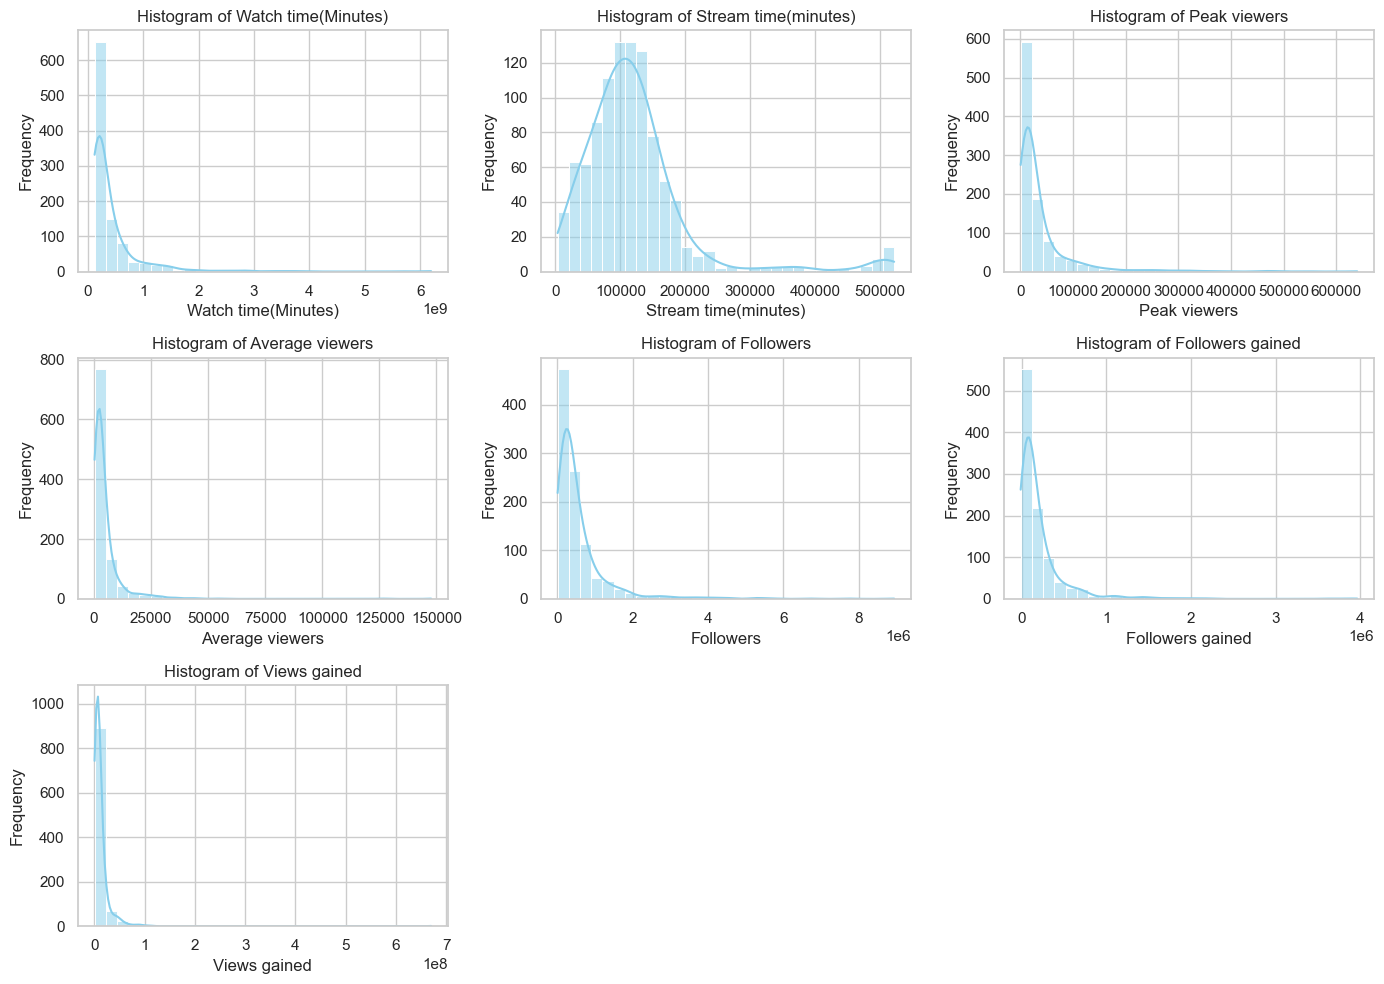

/var/folders/g5/sjg42d957nv4zln7j0rk6wyr0000gn/T/ipykernel_17959/1572620344.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
/var/folders/g5/sjg42d957nv4zln7j0rk6wyr0000gn/T/ipykernel_17959/1572620344.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
/var/folders/g5/sjg42d957nv4zln7j0rk6wyr0000gn/T/ipykernel_17959/1572620344.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


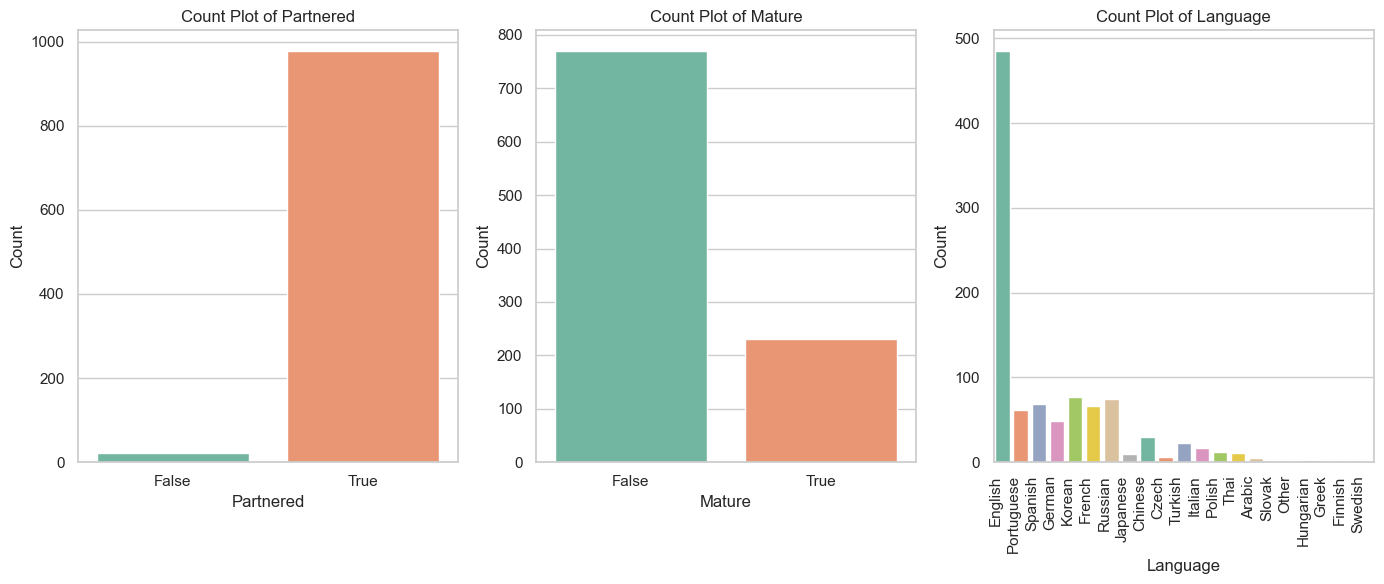

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set_theme(style="whitegrid")

# Numerical columns for histograms
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical columns for bar charts
categorical_columns = ['Partnered', 'Mature', 'Language']

# Create bar charts for categorical columns
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

    if col == 'Language':
        plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

In [3]:
# Statistical summary for numerical columns
numerical_summary = df[numerical_columns].describe().T

# Rename the '50%' column to '50% (median)' for clarity
numerical_summary.rename(columns={"50%": "50% (median)"}, inplace=True)

# Display the summary for max, min, mean, median
print("Statistical Summary (Max, Min, Mean, Median):")
print(numerical_summary[["min", "25%", "50% (median)", "75%", "max", "mean"]])

# Outlier detection using IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Outliers based on the IQR
outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (
    df[numerical_columns] > (Q3 + 1.5 * IQR)
)

# Displaying the number of outliers per column
outlier_counts = outliers.sum()
print("\nOutliers detected (IQR method):")
print(outlier_counts)

Statistical Summary (Max, Min, Mean, Median):
                              min           25%  50% (median)           75%  \
Watch time(Minutes)   122192850.0  1.631899e+08   234990787.5  4.337399e+08   
Stream time(minutes)       3465.0  7.375875e+04      108240.0  1.418438e+05   
Peak viewers                496.0  9.113750e+03       16676.0  3.756975e+04   
Average viewers             235.0  1.457750e+03        2425.0  4.786250e+03   
Followers                  3660.0  1.705462e+05      318063.0  6.243322e+05   
Followers gained         -15772.0  4.375825e+04       98352.0  2.361308e+05   
Views gained             175788.0  3.880602e+06     6456323.5  1.219676e+07   

                               max          mean  
Watch time(Minutes)   6.196162e+09  4.184279e+08  
Stream time(minutes)  5.214450e+05  1.205152e+05  
Peak viewers          6.393750e+05  3.706505e+04  
Average viewers       1.476430e+05  4.781040e+03  
Followers             8.938903e+06  5.700541e+05  
Followers gaine

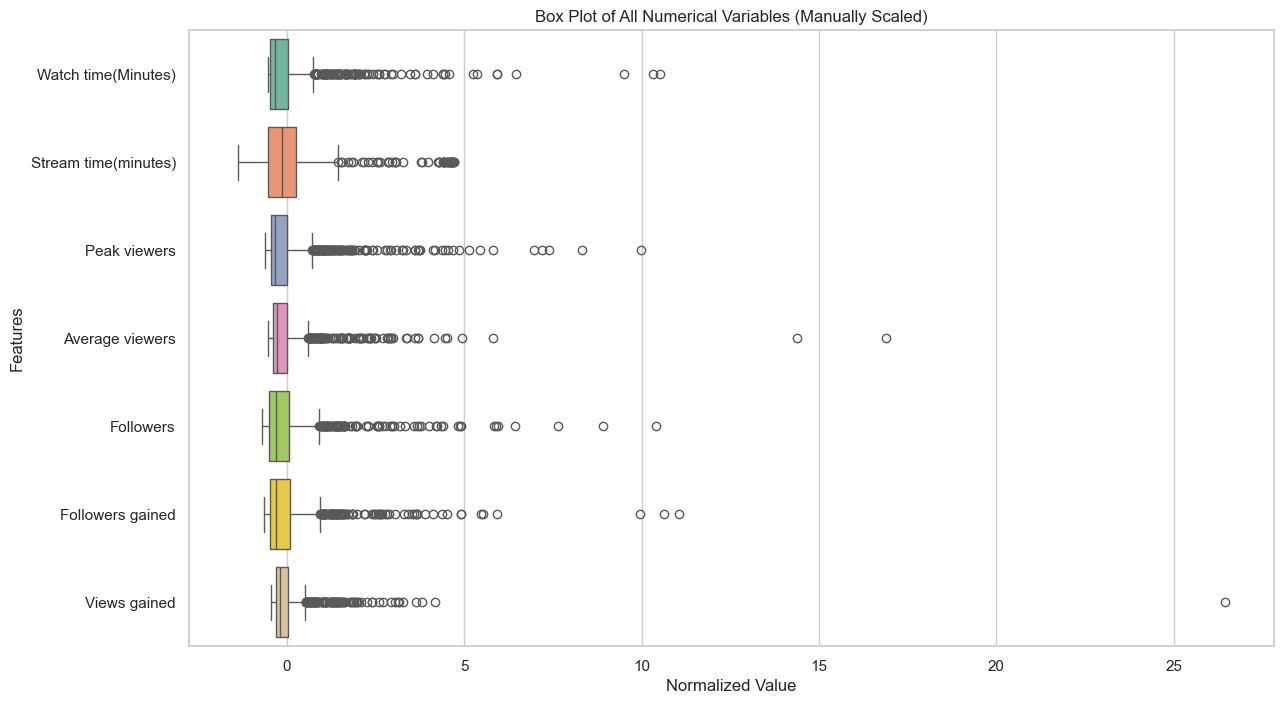

In [4]:
# Manually standardize the data
# So there is no scaling issues when presenting data alongside each other
scaled_df_manual = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()

# Plotting the scaled box plot (manual scaling)
plt.figure(figsize=(14, 8))
sns.boxplot(data=scaled_df_manual, orient="h", palette="Set2")
plt.title("Box Plot of All Numerical Variables (Manually Scaled)")
plt.xlabel("Normalized Value")
plt.ylabel("Features")
plt.show()


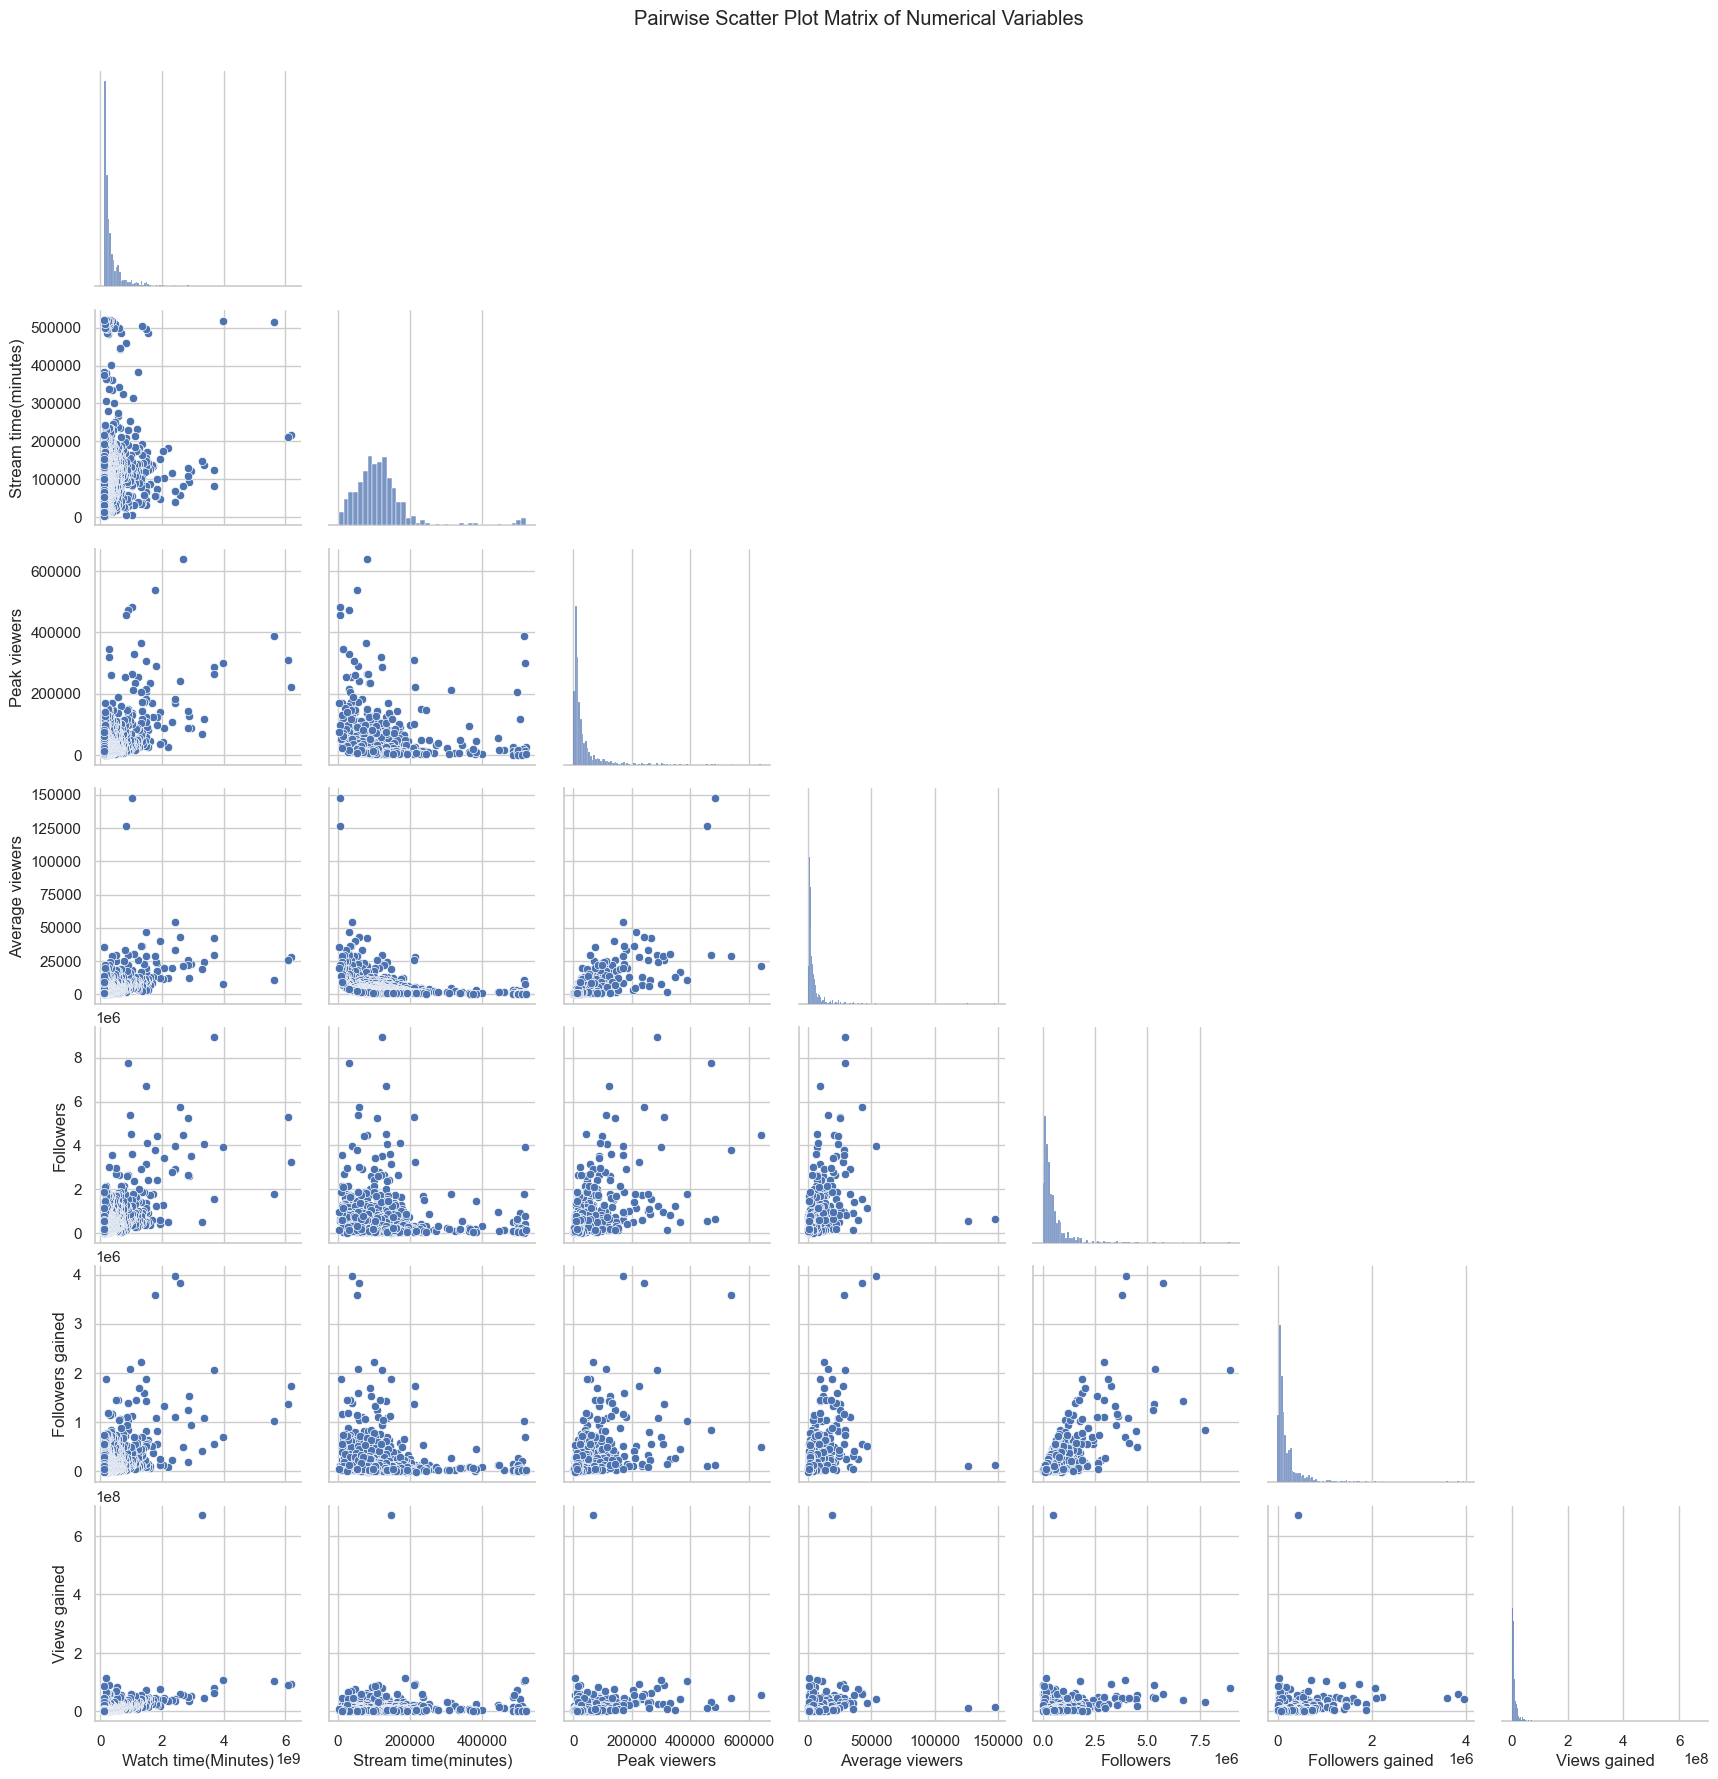

In [5]:
# Plotting the pair-wise relationships
sns.pairplot(df[numerical_columns], corner=True)
plt.suptitle("Pairwise Scatter Plot Matrix of Numerical Variables", y=1.02)
plt.show()

In [6]:
# This is an example of how we can show the categorical vs categorical data
# The following is a contingency table Partnered vs Language
# This will output a table showing how many instances of each combination of the Partnered and Language variables exist
contingency_table = pd.crosstab(df['Partnered'], df['Language'])

# Display the contingency table
print("Contingency Table (Partnered vs Language):")
print(contingency_table)

Contingency Table (Partnered vs Language):
Language   Arabic  Chinese  Czech  English  Finnish  French  German  Greek  \
Partnered                                                                    
False           0        0      0        9        0       1       1      0   
True            5       30      6      476        1      65      48      1   

Language   Hungarian  Italian  ...  Korean  Other  Polish  Portuguese  \
Partnered                      ...                                      
False              0        0  ...       1      1       0           1   
True               2       17  ...      76      0      12          60   

Language   Russian  Slovak  Spanish  Swedish  Thai  Turkish  
Partnered                                                    
False            7       0        1        0     0        0  
True            67       1       67        1    11       22  

[2 rows x 21 columns]


In [7]:
# Aggregating the mean of Peak viewers grouped by Language
avg_peak_viewers = df.groupby('Language')['Peak viewers'].mean()

# Display the aggregated results
print("\nAverage Peak Viewers by Language:")
print(avg_peak_viewers)


Average Peak Viewers by Language:
Language
Arabic        58281.400000
Chinese       13104.366667
Czech          9918.500000
English       41639.719588
Finnish        9676.000000
French        33865.409091
German        31274.734694
Greek          6289.000000
Hungarian     24780.000000
Italian       17425.117647
Japanese      22013.500000
Korean        18633.038961
Other         11533.000000
Polish        19968.083333
Portuguese    38463.475410
Russian       44290.013514
Slovak         9248.000000
Spanish       53186.985294
Swedish        2727.000000
Thai          16194.636364
Turkish       29991.545455
Name: Peak viewers, dtype: float64


/var/folders/g5/sjg42d957nv4zln7j0rk6wyr0000gn/T/ipykernel_17959/1384254028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Partnered', y='Average viewers', data=df, palette='Set2')


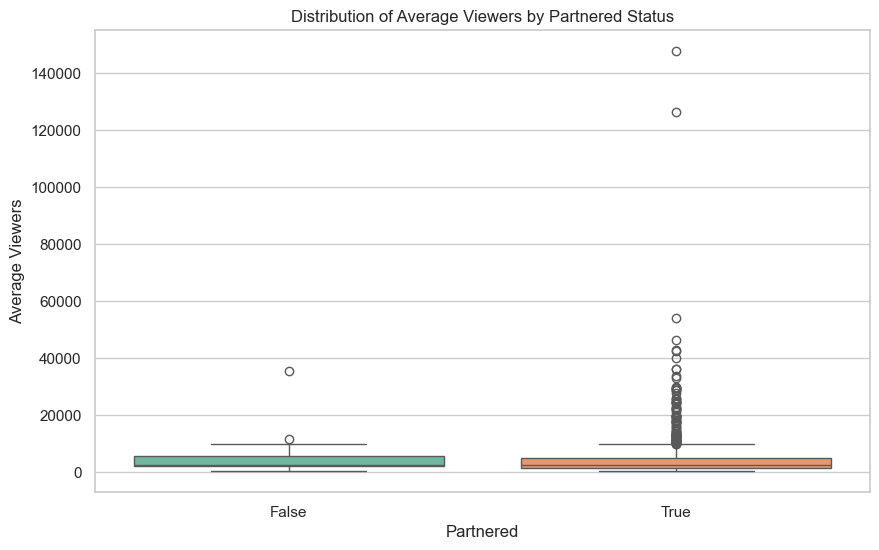

In [8]:
# To show catgorical vs numerical, we can use a box plot showing the distribution of Average viewers for each Partnered status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Partnered', y='Average viewers', data=df, palette='Set2')
plt.title("Distribution of Average Viewers by Partnered Status")
plt.xlabel("Partnered")
plt.ylabel("Average Viewers")
plt.show()